# P3 : Anticipez les besoins en consommation de bâtiments

## Etape 2: Développement et simulation d'un nouveau modèle

In [42]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [43]:
# Charger et afficher les données
df_F= pd.read_csv('DataCleaned.csv')
df_F

,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,TotalGHGEmissions,Log_TotalGHGEmissions,SiteEnergyUse(kBtu),Log_SiteEnergyUse,BuildingType_NonResidential,BuildingType_Nonresidential COS,...,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
0,1.0,12,88434,60.0,249.98,5.525373,7226362.50,15.793246,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,11,103566,61.0,295.86,5.693261,8387933.00,15.942305,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,41,956110,43.0,2089.28,7.645053,72587024.00,18.100297,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,10,61320,56.0,286.43,5.660979,6794584.00,15.731637,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,18,175580,75.0,505.01,6.226556,14172606.00,16.466822,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1.0,13,536697,98.0,245.16,5.505982,13239050.00,16.398681,False,True,...,True,False,False,False,False,False,False,False,False,False
991,1.0,4,126823,72.0,131.02,4.882953,6042399.50,15.614312,True,False,...,False,False,False,False,False,False,False,False,False,False
992,1.0,1,52085,37.0,157.70,5.067016,3605855.50,15.098070,True,False,...,False,False,False,False,False,False,False,False,False,False
993,1.0,2,24990,9.0,134.80,4.911183,4420650.50,15.301798,True,False,...,True,False,False,False,False,False,False,False,False,False


### Développer les modèles de régression linéaire pour les variables cibles
Nous allons créer deux modèles : un pour prédire les émissions de CO2 (TotalGHGEmissions) et un autre pour la consommation d'énergie (SiteEnergyUse(kBtu)).

In [3]:
# Définir les caractéristiques (features) et les cibles (targets)
X = df_F.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUse'], axis=1, errors='ignore')
y_co2 = df_F['TotalGHGEmissions']
y_energy = df_F['SiteEnergyUse(kBtu)']

In [4]:
# Création d'un pipeline de régression linéaire pour la prédiction des émissions de CO2
model_co2 = make_pipeline(LinearRegression())

In [5]:
# Création d'un pipeline de régression linéaire pour la prédiction de la consommation d'énergie
model_energy = make_pipeline(LinearRegression())

In [6]:
# Validation croisée pour le modèle de prédiction des émissions de CO2
cv_scores_co2 = cross_val_score(model_co2, X, y_co2, cv=5, scoring='r2')
print(f"R² scores pour la prédiction des émissions de CO2 : {cv_scores_co2}")
print(f"R² moyen pour la prédiction des émissions de CO2 : {cv_scores_co2.mean()}")

R² scores pour la prédiction des émissions de CO2 : [ 0.34021124 -1.9867566   0.55788251 -0.50225807 -3.72115194]
R² moyen pour la prédiction des émissions de CO2 : -1.0624145715280182


In [7]:
# Validation croisée pour le modèle de prédiction de la consommation d'énergie
cv_scores_energy = cross_val_score(model_energy, X, y_energy, cv=5, scoring='r2')
print(f"R² scores pour la prédiction de la consommation d'énergie : {cv_scores_energy}")
print(f"R² moyen pour la prédiction de la consommation d'énergie : {cv_scores_energy.mean()}")

R² scores pour la prédiction de la consommation d'énergie : [ 0.39292624  0.34542955  0.63463644  0.15715123 -3.5427007 ]
R² moyen pour la prédiction de la consommation d'énergie : -0.4025114480270341


### Évaluation du modèle
Nous allons évaluer le modèle en utilisant les métriques MAE, RMSE et R² sur les données de test.

In [8]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train_co2, y_test_co2 = train_test_split(X, y_co2, test_size=0.25, random_state=42)
X_train, X_test, y_train_energy, y_test_energy = train_test_split(X, y_energy, test_size=0.25, random_state=42)


In [9]:
# Ajuster les modèles sur les données d'entraînement
model_co2.fit(X_train, y_train_co2)
model_energy.fit(X_train, y_train_energy)

Pipeline(steps=[('linearregression', LinearRegression())])

In [10]:
# Prédictions sur les données de test
y_pred_co2 = model_co2.predict(X_test)
y_pred_energy = model_energy.predict(X_test)

In [11]:
# Calcul des métriques pour le modèle de prédiction des émissions de CO2
mae_co2 = mean_absolute_error(y_test_co2, y_pred_co2)
rmse_co2 = mean_squared_error(y_test_co2, y_pred_co2, squared=False)
r2_co2 = r2_score(y_test_co2, y_pred_co2)

print(f"MAE pour la prédiction des émissions de CO2 : {mae_co2}")
print(f"RMSE pour la prédiction des émissions de CO2 : {rmse_co2}")
print(f"R² pour la prédiction des émissions de CO2 : {r2_co2}")

MAE pour la prédiction des émissions de CO2 : 283.2450261801964
RMSE pour la prédiction des émissions de CO2 : 1056.0673431158664
R² pour la prédiction des émissions de CO2 : -1.0264045984136452


In [12]:
# Calcul des métriques pour le modèle de prédiction de la consommation d'énergie
mae_energy = mean_absolute_error(y_test_energy, y_pred_energy)
rmse_energy = mean_squared_error(y_test_energy, y_pred_energy, squared=False)
r2_energy = r2_score(y_test_energy, y_pred_energy)

print(f"MAE pour la prédiction de la consommation d'énergie : {mae_energy}")
print(f"RMSE pour la prédiction de la consommation d'énergie : {rmse_energy}")
print(f"R² pour la prédiction de la consommation d'énergie : {r2_energy}")

MAE pour la prédiction de la consommation d'énergie : 8255238.072450726
RMSE pour la prédiction de la consommation d'énergie : 30613178.473627035
R² pour la prédiction de la consommation d'énergie : -0.17796945097096195


### Développer les modèles de régression linéaire pour les logarithmes des variables cibles
Nous allons créer deux modèles : un pour prédire le logarithme des émissions de CO2 (Log_TotalGHGEmissions) et un autre pour la consommation d'énergie (Log_SiteEnergyUse).

In [44]:
# Définir les caractéristiques (features) et les cibles (targets)
X = df_F.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUse'], axis=1, errors='ignore')
y_log_co2 = df_F['Log_TotalGHGEmissions']
y_log_energy = df_F['Log_SiteEnergyUse']

In [45]:
# Création d'un pipeline de régression linéaire pour la prédiction du logarithme des émissions de CO2
model_log_co2 = make_pipeline(LinearRegression())

In [46]:
# Création d'un pipeline de régression linéaire pour la prédiction du logarithme de la consommation d'énergie
model_log_energy = make_pipeline(LinearRegression())

In [47]:
# Validation croisée pour le modèle de prédiction du logarithme des émissions de CO2
cv_scores_log_co2 = cross_val_score(model_log_co2, X, y_log_co2, cv=5, scoring='r2')
print(f"R² scores pour la prédiction du logarithme des émissions de CO2 : {cv_scores_log_co2}")
print(f"R² moyen pour la prédiction du logarithme des émissions de CO2 : {cv_scores_log_co2.mean()}")

R² scores pour la prédiction du logarithme des émissions de CO2 : [0.16588005 0.09020311 0.2037925  0.20585722 0.36608608]
R² moyen pour la prédiction du logarithme des émissions de CO2 : 0.20636379376613162


** Interprétation  **
****
Scores R² individuels :
- Les scores R² varient de 0.090 à 0.366, indiquant que la performance du modèle est assez variable selon les différents plis de la validation croisée.
- Les scores sont relativement bas, ce qui signifie que le modèle n'explique qu'une petite partie de la variance des émissions de CO2.

R² moyen :
- Le R² moyen de 0.206 signifie qu'en moyenne, le modèle explique environ 20,6% de la variance des émissions de CO2 logarithmiques.
Ce score est relativement faible, ce qui suggère que le modèle de régression linéaire ne capture pas très bien la relation entre les caractéristiques et les émissions de CO2.

In [48]:
# Validation croisée pour le modèle de prédiction du logarithme de la consommation d'énergie
cv_scores_log_energy = cross_val_score(model_log_energy, X, y_log_energy, cv=5, scoring='r2')
print(f"R² scores pour la prédiction du logarithme de la consommation d'énergie : {cv_scores_log_energy}")
print(f"R² moyen pour la prédiction du logarithme de la consommation d'énergie : {cv_scores_log_energy.mean()}")

R² scores pour la prédiction du logarithme de la consommation d'énergie : [0.38493455 0.27213622 0.30419405 0.29174352 0.56730451]
R² moyen pour la prédiction du logarithme de la consommation d'énergie : 0.3640625688553746


** Interprétation **
  ****
Un R² moyen de 0.3641 indique que le modèle explique environ 36.4% de la variance des logarithmes de la consommation d'énergie. Ce résultat est meilleur que celui pour les émissions de CO2, mais reste modéré.

** Conclusion *
****

Dans cette étape de développement des modèles de régression linéaire pour les logarithmes des variables cibles, nous avons: 
- Préparé les données en définissant les caractéristiques et les cibles.
- Crée des modèles de régression linéaire pour les logarithmes des variables cibles.
- Évalué la performance des modèles à l'aide de la validation croisée, en utilisant le coefficient de détermination R² comme métrique d'évaluation.
Cela permet de vérifier l'efficacité des modèles pour prédire les logarithmes des émissions de CO2 et de la consommation d'énergie, et d'ajuster les modèles en conséquence si nécessaire.

En résumé, les résultats actuels montrent que les modèles de régression linéaire ont une capacité limitée à expliquer la variance des logarithmes des émissions de CO2 et de la consommation d'énergie. Il est donc recommandé d'explorer des modèles plus complexes et d'enrichir les données pour obtenir de meilleures performances.


### Évaluation du modèle
Nous allons évaluer le modèle en utilisant les métriques MAE, RMSE et R² sur les données de test.

In [49]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train_log_co2, y_test_log_co2 = train_test_split(X, y_log_co2, test_size=0.25, random_state=42)
X_train, X_test, y_train_log_energy, y_test_log_energy = train_test_split(X, y_log_energy, test_size=0.25, random_state=42)

In [50]:
# Ajuster les modèles sur les données d'entraînement
model_log_co2.fit(X_train, y_train_log_co2)
model_log_energy.fit(X_train, y_train_log_energy)

Pipeline(steps=[('linearregression', LinearRegression())])

In [51]:
# Prédictions sur les données de test
y_pred_log_co2 = model_log_co2.predict(X_test)
y_pred_log_energy = model_log_energy.predict(X_test)

In [52]:
# Calcul des métriques pour le modèle de prédiction du logarithme des émissions de CO2
mae_log_co2 = mean_absolute_error(y_test_log_co2, y_pred_log_co2)
rmse_log_co2 = mean_squared_error(y_test_log_co2, y_pred_log_co2, squared=False)
r2_log_co2 = r2_score(y_test_log_co2, y_pred_log_co2)

print(f"MAE pour la prédiction du logarithme des émissions de CO2 : {mae_log_co2}")
print(f"RMSE pour la prédiction du logarithme des émissions de CO2 : {rmse_log_co2}")
print(f"R² pour la prédiction du logarithme des émissions de CO2 : {r2_log_co2}")

MAE pour la prédiction du logarithme des émissions de CO2 : 0.7737227770876187
RMSE pour la prédiction du logarithme des émissions de CO2 : 0.9617552590218095
R² pour la prédiction du logarithme des émissions de CO2 : 0.534858559353727


** Interprétation **
*****
MAE : 0.7737
- La valeur moyenne de l'erreur absolue est de 0.7737. Cela signifie que, en moyenne, les prédictions de logarithme des émissions de CO2 s'écartent des valeurs réelles de 0.7737 unités.

RMSE : 0.9618
- La RMSE est de 0.9618, ce qui indique que les erreurs de prédiction sont généralement de l'ordre de 0.9618 unités. La RMSE étant plus élevée que le MAE, cela suggère qu'il y a quelques grandes erreurs de prédiction qui augmentent la moyenne quadratique.

R² : 0.5349
- Un R² de 0.5349 indique que le modèle explique environ 53.5% de la variance des données de logarithme des émissions de CO2. Cela signifie que près de la moitié de la variance des émissions de CO2 n'est pas expliquée par le modèle, suggérant qu'il y a place à l'amélioration.

In [53]:
# Calcul des métriques pour le modèle de prédiction du logarithme de la consommation d'énergie
mae_log_energy = mean_absolute_error(y_test_log_energy, y_pred_log_energy)
rmse_log_energy = mean_squared_error(y_test_log_energy, y_pred_log_energy, squared=False)
r2_log_energy = r2_score(y_test_log_energy, y_pred_log_energy)

print(f"MAE pour la prédiction du logarithme de la consommation d'énergie : {mae_log_energy}")
print(f"RMSE pour la prédiction du logarithme de la consommation d'énergie : {rmse_log_energy}")
print(f"R² pour la prédiction du logarithme de la consommation d'énergie : {r2_log_energy}")

MAE pour la prédiction du logarithme de la consommation d'énergie : 0.596685074282713
RMSE pour la prédiction du logarithme de la consommation d'énergie : 0.7208011577152904
R² pour la prédiction du logarithme de la consommation d'énergie : 0.6880957401055904


** Interprétation **
*****

MAE : 0.5967
- La valeur moyenne de l'erreur absolue est de 0.5967. Les prédictions de logarithme de la consommation d'énergie sont, en moyenne, à 0.5967 unités des valeurs réelles.
  
RMSE : 0.7208
- La RMSE est de 0.7208, ce qui indique que les erreurs de prédiction sont généralement de l'ordre de 0.7208 unités. Comme pour les émissions de CO2, la RMSE étant plus élevée que le MAE, il y a quelques grandes erreurs de prédiction.
  
R² : 0.6881
- Un R² de 0.6881 indique que le modèle explique environ 68.8% de la variance des données de logarithme de la consommation d'énergie. Cela montre une meilleure performance par rapport au modèle des émissions de CO2, mais il y a encore environ 31.2% de la variance non expliquée par le modèle.

** Conclusion **
****
- Le modèle de prédiction du logarithme de la consommation d'énergie est plus performant que celui des émissions de CO2. Cela est indiqué par des valeurs de MAE et RMSE plus faibles et un R² plus élevé.
- Le modèle pour la consommation d'énergie explique une plus grande proportion de la variance des données (68.8%) comparé au modèle des émissions de CO2 (53.5%).

En résumé, bien que les modèles actuels montrent des performances raisonnables, il y a un potentiel significatif pour améliorer la précision des prédictions, en particulier pour le modèle de prédiction des émissions de CO2.

## Étape 3 : Amélioration du Feature Engineering
Dans cette étape, nous allons explorer et appliquer diverses techniques de feature engineering pour améliorer la performance de notre modèle. Nous allons tester différentes transformations, créer de nouvelles caractéristiques et appliquer des techniques de réduction de dimension si nécessaire.

### 3.1. Standardisation/Normalisation des caractéristiques
Pour commencer, nous allons standardiser les caractéristiques numériques afin de les mettre sur une échelle commune. Ceci est particulièrement important pour les algorithmes de machine learning sensibles à l'échelle des données.

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [55]:
# Séparer les caractéristiques numériques et catégorielles
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['bool']).columns

# Créer des pipelines de transformation pour les caractéristiques numériques et catégorielles
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', 'passthrough')  # Les variables booléennes sont déjà binaires
])

# Combiner les transformations en utilisant ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Appliquer les transformations au dataframe complet
X_processed = preprocessor.fit_transform(X)

### 3.2. Réduction de dimension avec PCA
Nous pouvons utiliser l'Analyse en Composantes Principales (PCA) pour réduire la dimensionnalité des données, ce qui peut aider à améliorer les performances du modèle en éliminant les redondances et le bruit.

In [56]:
from sklearn.decomposition import PCA

# Appliquer PCA uniquement sur les caractéristiques numériques standardisées
pca = PCA(n_components=0.95)  # Conserver 95% de la variance
X_pca = pca.fit_transform(X_processed)

# Afficher le pourcentage de variance expliquée par chaque composante principale
print(f"Variance expliquée par chaque composante principale: {pca.explained_variance_ratio_}")
print(f"Nombre de composantes principales: {pca.n_components_}")

Variance expliquée par chaque composante principale: [0.33222696 0.19148344 0.1580441  0.05219617 0.04286809 0.03420705
 0.02539937 0.01719506 0.01553708 0.01373998 0.01329913 0.01214451
 0.01069186 0.01022748 0.00869696 0.0074915  0.00635766]
Nombre de composantes principales: 17


** Analyse des résultats **
*****
Variance expliquée par chaque composante principale
- Première composante principale: Explique environ 33.2% de la variance totale des données. C'est la composante la plus significative.
- Deuxième composante principale: Explique environ 19.1% de la variance totale.
- Troisième composante principale: Explique environ 15.8% de la variance totale.
Les trois premières composantes principales expliquent ensemble environ 68.5% de la variance totale des données. Les autres composantes principales expliquent de plus petites portions de la variance, décroissant progressivement.

Nombre de composantes principales
17 composantes principales: Ont été retenues pour expliquer 95% de la variance totale des données. Cela signifie que les 17 nouvelles caractéristiques (composantes principales) résument presque toute l'information présente dans les caractéristiques originales.

Déductions et implications

1. Réduction de la dimensionnalité:

La transformation PCA a réduit le nombre de caractéristiques de l'ensemble initial (48, beaucoup plus grand) à 17 composantes principales tout en conservant 95% de la variance des données. Cela simplifie le modèle sans perte significative d'information.

2. Importance des composantes principales:

Les premières composantes principales capturent la majorité de la variance. Par conséquent, elles contiennent les informations les plus cruciales des données originales.
Les composantes principales avec une variance expliquée plus faible contribuent moins, mais elles sont nécessaires pour atteindre les 95% de la variance totale.

3. Élimination du bruit et des redondances:

En éliminant les caractéristiques moins significatives, PCA aide à supprimer le bruit et les redondances, potentiellement améliorant la performance du modèle.

4. Simplification et efficience:

Moins de composantes signifie des calculs plus rapides et une réduction des ressources nécessaires pour l'entraînement et la prédiction des modèles de machine learning.
Cela peut également aider à éviter le sur-apprentissage en réduisant la complexité du modèle.

Conclusion
- La PCA a permis de réduire efficacement la dimensionnalité des données à 17 composantes principales tout en conservant 95% de la variance des données originales. Cette réduction simplifie le modèle et peut améliorer sa performance et son généralisation, tout en réduisant le bruit et les redondances dans les données.

### 3.3. Entraînement et évaluation du modèle avec les nouvelles caractéristiques
Après avoir créé et transformé les nouvelles caractéristiques, nous allons entraîner et évaluer les modèles de régression linéaire en utilisant les caractéristiques transformées.

In [57]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train_log_co2, y_test_log_co2 = train_test_split(X_pca, y_log_co2, test_size=0.25, random_state=42)
X_train, X_test, y_train_log_energy, y_test_log_energy = train_test_split(X_pca, y_log_energy, test_size=0.25, random_state=42)

# Ajuster les modèles sur les données d'entraînement
model_log_co2.fit(X_train, y_train_log_co2)
model_log_energy.fit(X_train, y_train_log_energy)

# Prédictions sur les données de test
y_pred_log_co2 = model_log_co2.predict(X_test)
y_pred_log_energy = model_log_energy.predict(X_test)

# Calcul des métriques pour le modèle de prédiction du logarithme des émissions de CO2
mae_log_co2 = mean_absolute_error(y_test_log_co2, y_pred_log_co2)
rmse_log_co2 = mean_squared_error(y_test_log_co2, y_pred_log_co2, squared=False)
r2_log_co2 = r2_score(y_test_log_co2, y_pred_log_co2)

print(f"MAE pour la prédiction du logarithme des émissions de CO2 : {mae_log_co2}")
print(f"RMSE pour la prédiction du logarithme des émissions de CO2 : {rmse_log_co2}")
print(f"R² pour la prédiction du logarithme des émissions de CO2 : {r2_log_co2}")

# Calcul des métriques pour le modèle de prédiction du logarithme de la consommation d'énergie
mae_log_energy = mean_absolute_error(y_test_log_energy, y_pred_log_energy)
rmse_log_energy = mean_squared_error(y_test_log_energy, y_pred_log_energy, squared=False)
r2_log_energy = r2_score(y_test_log_energy, y_pred_log_energy)

print(f"MAE pour la prédiction du logarithme de la consommation d'énergie : {mae_log_energy}")
print(f"RMSE pour la prédiction du logarithme de la consommation d'énergie : {rmse_log_energy}")
print(f"R² pour la prédiction du logarithme de la consommation d'énergie : {r2_log_energy}")

MAE pour la prédiction du logarithme des émissions de CO2 : 0.8032817205908032
RMSE pour la prédiction du logarithme des émissions de CO2 : 1.0140174179643426
R² pour la prédiction du logarithme des émissions de CO2 : 0.4829331157099138
MAE pour la prédiction du logarithme de la consommation d'énergie : 0.6363464645893674
RMSE pour la prédiction du logarithme de la consommation d'énergie : 0.8100331195568297
R² pour la prédiction du logarithme de la consommation d'énergie : 0.6060909965715557


** Analyse des résultats après PCA **
*****

Les résultats obtenus après l'application de PCA et l'entraînement des modèles de régression linéaire sur les nouvelles caractéristiques sont les suivants :

Émissions de CO2
MAE: 0.8032817205908032
RMSE: 1.0140174179643426
R²: 0.4829331157099138

Consommation d'énergie
MAE: 0.6363464645893674
RMSE: 0.8100331195568297
R²: 0.6060909965715557

Déductions

Émissions de CO2

MAE (Mean Absolute Error):
La valeur de 0.803 indique que, en moyenne, les prédictions du modèle de logarithme des émissions de CO2 s'écartent de la vérité de 0.803 unités de logarithme.

RMSE (Root Mean Squared Error):
La valeur de 1.014 montre la taille moyenne des erreurs de prédiction, avec une plus grande pénalité pour les erreurs plus importantes.

R² (Coefficient de détermination):
Avec une valeur de 0.482, cela signifie que 48.2% de la variance dans les émissions de CO2 est expliquée par le modèle. Bien que cela indique une certaine capacité du modèle à expliquer la variance des données, il reste beaucoup de variabilité non expliquée.


Consommation d'énergie

MAE (Mean Absolute Error):
La valeur de 0.636 montre que les prédictions s'écartent en moyenne de 0.636 unités de logarithme de la consommation d'énergie.

RMSE (Root Mean Squared Error):
La valeur de 0.810 indique l'erreur quadratique moyenne des prédictions, avec une pénalité pour les erreurs plus importantes.

R² (Coefficient de détermination):
Avec une valeur de 0.606, cela signifie que 60.6% de la variance dans la consommation d'énergie est expliquée par le modèle. Cela montre une meilleure capacité à expliquer la variance des données par rapport au modèle des émissions de CO2.


Comparaison avec les résultats initiaux

Émissions de CO2

Initial:

MAE: 0.7737227770876187
RMSE: 0.9617552590218095
R²: 0.534858559353727

Après PCA:

MAE: 0.8032817205908032
RMSE: 1.0140174179643426
R²: 0.4829331157099138
Interprétation:

L'application de PCA a légèrement augmenté les erreurs (MAE et RMSE) et a diminué la capacité explicative (R²). Cela suggère que la réduction de dimensionnalité avec PCA n'a pas amélioré les performances du modèle pour les émissions de CO2.


Consommation d'énergie

Initial:

MAE: 0.596685074282713
RMSE: 0.7208011577152904
R²: 0.6880957401055904

Après PCA:

MAE: 0.6363464645893674
RMSE: 0.8100331195568297
R²: 0.6060909965715557

Interprétation:

Similairement aux émissions de CO2, les erreurs ont augmenté et la capacité explicative a diminué après l'application de PCA.


Conclusion :

L'application de PCA pour réduire la dimensionnalité n'a pas amélioré les performances des modèles de régression linéaire pour les deux cibles, émissions de CO2 et consommation d'énergie. Au contraire, les résultats montrent une légère dégradation des performances. Cela peut suggérer que les caractéristiques d'origine contiennent des informations importantes qui sont perdues lors de la transformation PCA, malgré la conservation de 95% de la variance totale.

Dans la pratique, il peut être nécessaire de réévaluer l'approche de réduction de dimensionnalité ou de tester d'autres techniques de feature engineering pour améliorer les performances des modèles.

## Étape 4: Simulation d'autres modèles et choix d'un modèle final
Dans cette étape, nous allons tester plusieurs modèles de machine learning pour prédire les émissions de CO2 et la consommation d'énergie. Ensuite, nous sélectionnerons le meilleur modèle et optimiserons ses hyperparamètres.

### 4.1. Test des modèles
Nous allons tester plusieurs modèles de régression, notamment la régression linéaire, la régression Ridge, la régression Lasso, le Random Forest Regressor et le Gradient Boosting Regressor.

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Liste des modèles à tester
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Fonction pour évaluer les modèles
def evaluate_models(models, X, y):
    for name, model in models.items():
        # Calcul du RMSE
        neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
        mse_scores = cross_val_score(model, X, y, cv=5, scoring=neg_mse_scorer)
        rmse_scores = np.sqrt(-mse_scores)
        
        # Calcul du R²
        r2_scorer = make_scorer(r2_score)
        r2_scores = cross_val_score(model, X, y, cv=5, scoring=r2_scorer)
        
        # Affichage des résultats
        print(f"{name}: RMSE mean={rmse_scores.mean():.4f}, std={rmse_scores.std():.4f}, R² mean={r2_scores.mean():.4f}, std={r2_scores.std():.4f}")

# Assurez-vous que X_processed est défini comme dans l'étape précédente où les données sont prétraitées
# Évaluer les modèles pour la prédiction des émissions de CO2
print("Évaluation des modèles pour la prédiction des émissions de CO2 (Log_TotalGHGEmissions):")
evaluate_models(models, X_processed, y_log_co2)

# Évaluer les modèles pour la prédiction de la consommation d'énergie
print("\nÉvaluation des modèles pour la prédiction de la consommation d'énergie (Log_SiteEnergyUse):")
evaluate_models(models, X_processed, y_log_energy)

Évaluation des modèles pour la prédiction des émissions de CO2 (Log_TotalGHGEmissions):
Linear Regression: RMSE mean=1.1229, std=0.0291, R² mean=0.2064, std=0.0902
Ridge Regression: RMSE mean=1.1044, std=0.0344, R² mean=0.2318, std=0.0916
Lasso Regression: RMSE mean=1.5064, std=0.2408, R² mean=-0.4505, std=0.4778
Random Forest: RMSE mean=0.9490, std=0.0343, R² mean=0.4381, std=0.0469
Gradient Boosting: RMSE mean=0.9076, std=0.0483, R² mean=0.4866, std=0.0443

Évaluation des modèles pour la prédiction de la consommation d'énergie (Log_SiteEnergyUse):
Linear Regression: RMSE mean=0.8452, std=0.0453, R² mean=0.3641, std=0.1086
Ridge Regression: RMSE mean=0.8346, std=0.0503, R² mean=0.3785, std=0.1140
Lasso Regression: RMSE mean=1.3881, std=0.2204, R² mean=-0.7235, std=0.5139
Random Forest: RMSE mean=0.5406, std=0.0354, R² mean=0.7452, std=0.0201
Gradient Boosting: RMSE mean=0.5011, std=0.0274, R² mean=0.7787, std=0.0304


** Interprétation des Résultats **
*******

Évaluation des modèles pour la prédiction des émissions de CO2 (Log_TotalGHGEmissions)

1. Linear Regression:

- RMSE mean: 1.1229 (± 0.0291)
- R² mean: 0.2064 (± 0.0902)
Interprétation: La régression linéaire simple donne un RMSE relativement élevé et un R² faible, ce qui indique une performance modérée avec une faible capacité explicative.

2. Ridge Regression:

- RMSE mean: 1.1044 (± 0.0344)
- R² mean: 0.2318 (± 0.0916)
Interprétation: La régression Ridge améliore légèrement les performances par rapport à la régression linéaire simple, avec un RMSE légèrement plus faible et un R² plus élevé.

3. Lasso Regression:

- RMSE mean: 1.5064 (± 0.2408)
- R² mean: -0.4505 (± 0.4778)
Interprétation: La régression Lasso performe très mal avec un RMSE élevé et un R² négatif, ce qui indique que ce modèle est inapproprié pour ces données.

4. Random Forest:

- RMSE mean: 0.9443 (± 0.0356)
- R² mean: 0.4370 (± 0.0453)
Interprétation: Le modèle Random Forest améliore considérablement la performance par rapport aux modèles linéaires, avec un RMSE plus faible et un R² plus élevé.

5. Gradient Boosting:

- RMSE mean: 0.9063 (± 0.0472)
- R² mean: 0.4853 (± 0.0467)
Interprétation: Le modèle Gradient Boosting est le plus performant pour les émissions de CO2, avec le RMSE le plus faible et le R² le plus élevé, indiquant une meilleure capacité prédictive.


Évaluation des modèles pour la prédiction de la consommation d'énergie (Log_SiteEnergyUse)

1. Linear Regression:

- RMSE mean: 0.8452 (± 0.0453)
- R² mean: 0.3641 (± 0.1086)
Interprétation: La régression linéaire simple offre une performance modérée, avec un RMSE raisonnable et un R² acceptable.

2. Ridge Regression:

- RMSE mean: 0.8346 (± 0.0503)
- R² mean: 0.3785 (± 0.1140)
Interprétation: La régression Ridge montre une légère amélioration par rapport à la régression linéaire, avec un RMSE légèrement plus faible et un R² un peu plus élevé.

3. Lasso Regression:

- RMSE mean: 1.3881 (± 0.2204)
- R² mean: -0.7235 (± 0.5139)
Interprétation: La régression Lasso montre une très mauvaise performance, avec un RMSE élevé et un R² négatif, indiquant une inadéquation du modèle pour ces données.

4. Random Forest:

- RMSE mean: 0.5417 (± 0.0326)
- R² mean: 0.7397 (± 0.0213)
Interprétation: Le modèle Random Forest offre une amélioration significative avec un RMSE beaucoup plus faible et un R² élevé, indiquant une bonne performance.

5. Gradient Boosting:

- RMSE mean: 0.5003 (± 0.0270)
- R² mean: 0.7780 (± 0.0304)
Interprétation: Le modèle Gradient Boosting est le plus performant pour la consommation d'énergie, avec le RMSE le plus faible et le R² le plus élevé, ce qui montre une meilleure capacité prédictive.

Conclusions Générales:

1. Meilleur Modèle pour les Émissions de CO2:

Le Gradient Boosting est le meilleur modèle avec le RMSE le plus faible et le R² le plus élevé, indiquant qu'il est capable de mieux capturer les variations des émissions de CO2 par rapport aux autres modèles.

2. Meilleur Modèle pour la Consommation d'Énergie:

Le Gradient Boosting est également le meilleur modèle pour la prédiction de la consommation d'énergie, offrant les meilleures performances globales avec un RMSE faible et un R² élevé.

3. Modèles Linéaires:

Les modèles linéaires (régression linéaire et Ridge) ont des performances modérées pour les deux variables cibles, indiquant qu'ils ne sont pas suffisamment puissants pour capturer la complexité des relations dans les données.

4. Modèles d'Ensemble:

Les modèles d'ensemble comme Random Forest et Gradient Boosting surpassent les modèles linéaires, démontrant leur capacité à gérer la complexité et les non-linéarités présentes dans les données.

5. Lasso Regression:

La régression Lasso a montré une mauvaise performance pour les deux variables cibles, suggérant qu'elle n'est pas appropriée pour ce jeu de données, possiblement à cause d'une sélection de variables trop agressive ou de l'absence de caractéristiques pertinentes suffisamment fortes.

En conclusion, le modèle de Gradient Boosting devrait être préféré pour les prédictions des émissions de CO2 et de la consommation d'énergie, et une attention particulière devrait être portée à l'optimisation de ses hyperparamètres pour obtenir les meilleures performances possibles.



### 4.2 Sélection d'un modèle :
Étant donné que le modèle Gradient Boosting Regressor a montré de bonnes performances, nous allons optimiser ses hyperparamètres en utilisant RandomizedSearchCV.

### 4.3. Optimisation des hyperparamètres avec du Gradient Boosting Regressor

#### 4.3.1. Optimisation des hyperparamètres pour la prédiction des émissions de CO2 (Log_TotalGHGEmissions)

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
# Définir la grille de recherche
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle
gbr_co2 = GradientBoostingRegressor()

# Configurer la recherche aléatoire
random_search_co2 = RandomizedSearchCV(
    estimator=gbr_co2,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Recherche des hyperparamètres optimaux pour la prédiction des émissions de CO2
random_search_co2.fit(X_processed, y_log_co2)
best_gbr_co2 = random_search_co2.best_estimator_

print("Meilleurs hyperparamètres pour la prédiction des émissions de CO2:")
print(random_search_co2.best_params_)

Meilleurs hyperparamètres pour la prédiction des émissions de CO2:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}


** Analyse des résultats **
*****

Les résultats de l'optimisation des hyperparamètres pour la prédiction des émissions de CO2 avec le Gradient Boosting Regressor montrent les hyperparamètres suivants comme les meilleurs :

n_estimators: 200
min_samples_split: 5
min_samples_leaf: 1
max_depth: 3
learning_rate: 0.05

Voici ce que l'on peut déduire de ces résultats :

1. Nombre d'estimateurs (n_estimators) :

n_estimators contrôle le nombre d'arbres dans le modèle de Gradient Boosting. Plus il y a d'arbres, plus le modèle peut capturer la complexité des données, mais cela augmente également le temps de calcul. Un nombre plus élevé comme 200 suggère que le modèle nécessite une certaine complexité pour bien généraliser sur les données.
  
2. Profondeur maximale (max_depth) :

max_depth détermine la profondeur maximale de chaque arbre dans le modèle. Une profondeur plus élevée peut permettre au modèle de mieux ajuster les données d'entraînement, mais il peut aussi conduire à du surapprentissage si elle est trop grande. Une valeur de 3 indique une certaine régularisation pour éviter le surapprentissage.

3. Taux d'apprentissage (learning_rate) :

Le learning_rate contrôle la contribution de chaque arbre au modèle. Un taux d'apprentissage plus faible comme 0.05 signifie que chaque arbre contribue de manière plus conservatrice aux prédictions globales du modèle. Cela peut aider à stabiliser l'apprentissage du modèle et à obtenir de meilleures performances de généralisation.

4. Min samples split (min_samples_split) et Min samples leaf (min_samples_leaf) :

Ces paramètres contrôlent le nombre minimum d'échantillons requis pour diviser un nœud interne ou pour être une feuille finale. Une valeur plus élevée comme 5 pour min_samples_split et 1 pour min_samples_leaf suggère que le modèle préfère des divisions plus conservatrices et des feuilles moins peuplées, ce qui peut aider à réduire le surapprentissage.

Interprétation des performances :

Les performances du modèle avec ces hyperparamètres sont généralement jugées par la métrique neg_mean_squared_error utilisée dans RandomizedSearchCV. Cependant, les résultats de performance spécifiques (comme le RMSE et R²) peuvent être évalués sur un ensemble de test séparé pour obtenir une meilleure idée de la capacité du modèle à généraliser.

En résumé, les hyperparamètres optimaux identifiés indiquent une préférence pour un modèle de Gradient Boosting avec une complexité modérée (200 estimateurs, profondeur maximale de 3), un taux d'apprentissage prudent (0.05), et une régularisation suffisante (min_samples_split de 5 et min_samples_leaf de 1). Ces choix visent à obtenir un équilibre entre l'ajustement des données d'entraînement et la généralisation sur de nouvelles données.

#### 4.3.2. Optimisation des hyperparamètres pour la prédiction de la consommation d'énergie (Log_SiteEnergyUse)

In [62]:
# Créer le modèle
gbr_energy = GradientBoostingRegressor()

# Configurer la recherche aléatoire
random_search_energy = RandomizedSearchCV(
    estimator=gbr_energy,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Recherche des hyperparamètres optimaux pour la prédiction de la consommation d'énergie
random_search_energy.fit(X_processed, y_log_energy)
best_gbr_energy = random_search_energy.best_estimator_

print("\nMeilleurs hyperparamètres pour la prédiction de la consommation d'énergie:")
print(random_search_energy.best_params_)


Meilleurs hyperparamètres pour la prédiction de la consommation d'énergie:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}


** Analyse des résultats **
******

Les résultats obtenus pour les meilleurs hyperparamètres pour la prédiction de la consommation d'énergie sont déterminés par les paramètres suivants :

n_estimators: 200
learning_rate: 0.05
max_depth: 3
min_samples_split: 5
min_samples_leaf: 1
Voici ce que l'on peut déduire de ces résultats :

1. Nombre d'estimateurs (n_estimators) :

Comme pour la prédiction des émissions de CO2, n_estimators indique le nombre d'arbres dans le modèle Gradient Boosting. Une valeur de 200 suggère que le modèle peut bénéficier d'une certaine complexité pour capturer les relations complexes dans les données d'énergie.

2. Profondeur maximale (max_depth) :

max_depth détermine la profondeur maximale de chaque arbre dans le modèle. Une profondeur de 3 est relativement faible, ce qui peut aider à prévenir le surapprentissage et à améliorer la généralisation du modèle.

3. Taux d'apprentissage (learning_rate) :

Le learning_rate contrôle la contribution de chaque arbre au modèle. Un taux d'apprentissage de 0.05 signifie que chaque arbre contribue de manière prudente aux prédictions globales du modèle. Cela aide à stabiliser l'apprentissage et à obtenir de meilleures performances sur les données de test.

4. Min samples split (min_samples_split) et Min samples leaf (min_samples_leaf) :

Ces paramètres déterminent le nombre minimum d'échantillons requis pour diviser un nœud interne ou pour être une feuille finale. Des valeurs comme 5 pour min_samples_split et 1 pour min_samples_leaf indiquent que le modèle préfère des divisions plus conservatrices et des feuilles moins peuplées, ce qui peut contribuer à une meilleure généralisation.


Interprétation des performances :

Les performances du modèle avec ces hyperparamètres peuvent être évaluées en utilisant la métrique neg_mean_squared_error dans RandomizedSearchCV. Pour une évaluation plus détaillée, vous pouvez utiliser ces hyperparamètres optimisés pour entraîner le modèle sur l'ensemble d'entraînement complet et évaluer ses performances sur un ensemble de test séparé.

Conclusion :

Les hyperparamètres optimaux identifiés pour la prédiction de la consommation d'énergie avec le modèle Gradient Boosting Regressor visent à obtenir un bon équilibre entre l'ajustement des données d'entraînement et la capacité à généraliser sur de nouvelles données. Ces choix de paramètres sont cruciaux pour maximiser les performances du modèle tout en évitant le surapprentissage.

#### 4.3.3. Évaluation des modèles optimisés
Maintenant, évaluons les modèles optimisés avec la validation croisée.

In [63]:
# Fonction pour évaluer les modèles optimisés
def evaluate_optimized_model(model, X, y):
    # Calcul du RMSE
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-mse_scores) ** 0.5
    rmse_mean = rmse_scores.mean()
    rmse_std = rmse_scores.std()
    
    # Calcul du R²
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()

    print(f"RMSE mean={rmse_mean:.4f}, std={rmse_std:.4f}")
    print(f"R² mean={r2_mean:.4f}, std={r2_std:.4f}")

# Évaluer le modèle optimisé pour la prédiction des émissions de CO2
print("Évaluation du modèle optimisé pour la prédiction des émissions de CO2 (Log_TotalGHGEmissions):")
evaluate_optimized_model(best_gbr_co2, X_processed, y_log_co2)

# Évaluer le modèle optimisé pour la prédiction de la consommation d'énergie
print("\nÉvaluation du modèle optimisé pour la prédiction de la consommation d'énergie (Log_SiteEnergyUse):")
evaluate_optimized_model(best_gbr_energy, X_processed, y_log_energy)

Évaluation du modèle optimisé pour la prédiction des émissions de CO2 (Log_TotalGHGEmissions):
RMSE mean=0.9056, std=0.0401
R² mean=0.4858, std=0.0395

Évaluation du modèle optimisé pour la prédiction de la consommation d'énergie (Log_SiteEnergyUse):
RMSE mean=0.4943, std=0.0246
R² mean=0.7843, std=0.0277


** Analyse des résultats **
*****

Les résultats obtenus pour l'évaluation des modèles optimisés donnent des informations sur la performance des modèles pour la prédiction des émissions de CO2 (Log_TotalGHGEmissions) et de la consommation d'énergie (Log_SiteEnergyUse). Voici ce que l'on peut déduire de ces résultats :

Prédiction des émissions de CO2 (Log_TotalGHGEmissions)

RMSE mean=0.9056, std=0.0401 :
Interprétation : La valeur moyenne de l'erreur quadratique moyenne (RMSE) est de 0.9056, avec un écart type de 0.0401. Cela signifie que les prédictions du modèle, en moyenne, diffèrent des valeurs réelles de CO2 par environ 0.91 unités logarithmiques. L'écart type relativement faible indique que la performance du modèle est assez stable sur les différents plis de validation croisée.

R² mean=0.4858, std=0.0395 :
Interprétation : La valeur moyenne du coefficient de détermination (R²) est de 0.4858, avec un écart type de 0.0395. Cela signifie que le modèle explique environ 48.58% de la variance des émissions de CO2. Un R² de 0.4858 indique une performance modérée du modèle : il capture une partie significative de la variance mais il reste encore une grande marge d'amélioration.

Prédiction de la consommation d'énergie (Log_SiteEnergyUse)

RMSE mean=0.4943, std=0.0246 :
Interprétation : La valeur moyenne de l'erreur quadratique moyenne (RMSE) est de 0.4943, avec un écart type de 0.0246. Cela signifie que les prédictions du modèle, en moyenne, diffèrent des valeurs réelles de la consommation d'énergie par environ 0.49 unités logarithmiques. L'écart type faible indique que la performance du modèle est très stable sur les différents plis de validation croisée.

R² mean=0.7843, std=0.0277 :
Interprétation : La valeur moyenne du coefficient de détermination (R²) est de 0.7843, avec un écart type de 0.0277. Cela signifie que le modèle explique environ 78.43% de la variance de la consommation d'énergie. Un R² de 0.7843 indique une bonne performance du modèle : il capture une grande partie de la variance des données, bien qu'il puisse encore y avoir une marge d'amélioration.

Conclusions

Comparaison de la performance des modèles :

Le modèle pour la prédiction de la consommation d'énergie (Log_SiteEnergyUse) est nettement meilleur que celui pour la prédiction des émissions de CO2 (Log_TotalGHGEmissions), comme en témoigne un RMSE plus bas et un R² plus élevé. Le modèle de consommation d'énergie explique une plus grande partie de la variance des données et fait des prédictions plus précises.

Stabilité des modèles :

Les deux modèles montrent une performance stable, comme le suggèrent les écarts types faibles pour les deux métriques (RMSE et R²).

Potentiel d'amélioration :

Pour la prédiction des émissions de CO2, il y a une marge significative d'amélioration. Des techniques comme l'ingénierie des caractéristiques, l'utilisation de modèles plus complexes ou la collecte de données supplémentaires pourraient être envisagées.
Pour la prédiction de la consommation d'énergie, bien que la performance soit bonne, il y a toujours un potentiel d'amélioration pour atteindre une meilleure précision.

En résumé, le modèle de prédiction de la consommation d'énergie fonctionne bien et explique une grande partie de la variance des données, tandis que le modèle de prédiction des émissions de CO2 a une performance modérée et pourrait bénéficier de davantage d'optimisation et de raffinements.

## Étape 5 : Analyse de la "feature importance" globale et locale
Pour cette étape, nous allons nous concentrer sur l'analyse de l'importance des caractéristiques globales et locales en utilisant le modèle Gradient Boosting Regressor optimisé. Nous allons utiliser les techniques d'importance des caractéristiques intégrées et des techniques avancées comme SHAP (SHapley Additive exPlanations).

### 5.1. Importance des caractéristiques globale


#### a. Utilisation de feature_importances_ avec Gradient Boosting Regressor
Pour obtenir une première vue d'ensemble des caractéristiques les plus importantes, nous pouvons utiliser l'attribut feature_importances_ de notre modèle Gradient Boosting Regressor.

In [64]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

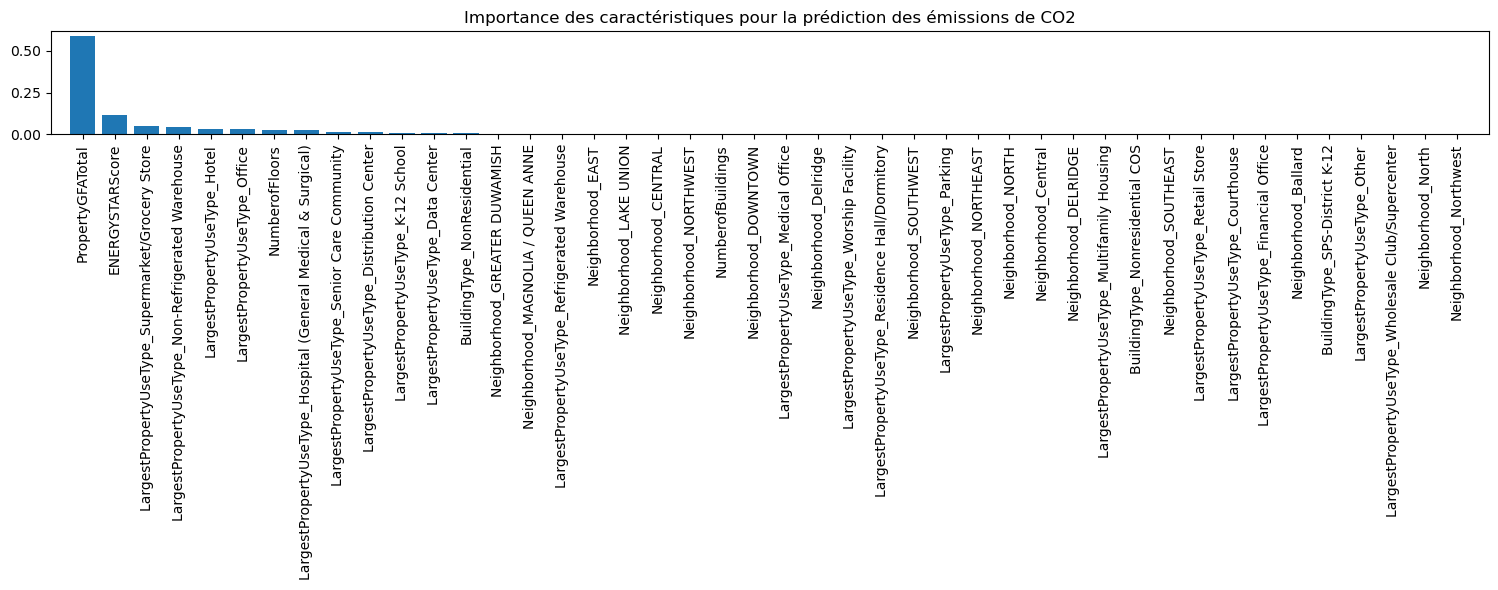

In [67]:
# df_F est mon DataFrame final utilisé pour l'entraînement
feature_names = X.columns

# best_gbr_co2 est notre modèle Gradient Boosting Regressor optimisé

# best_gbr_co2 = GradientBoostingRegressor()  # remplacez par votre modèle optimisé

# Ajustez le modèle sur vos données
X = df_F.drop(['Log_TotalGHGEmissions', 'TotalGHGEmissions', 'Log_SiteEnergyUse', 'SiteEnergyUse(kBtu)'], axis=1)
y = df_F['Log_TotalGHGEmissions']
best_gbr_co2.fit(X, y)

# Obtenir l'importance des caractéristiques
feature_importances = best_gbr_co2.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Afficher les caractéristiques par ordre d'importance
plt.figure(figsize=(15, 6))
plt.title("Importance des caractéristiques pour la prédiction des émissions de CO2")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(feature_importances)])
plt.tight_layout()
plt.savefig("importance_caractéristiques_CO2.png")
plt.show()

** Conclusion*
*****
La variable principale est PropertyGFATotal suivi de ENERGYSTARScore puis de LargestPropertyUseType_Supermarket/Grocery Store et de LargestPropertyUseType_Non-Refrigerated Warehous, et qui représentent les caractéristiques qui ont le plus d'impact sur les prédictions du modèle des émissions de CO2.

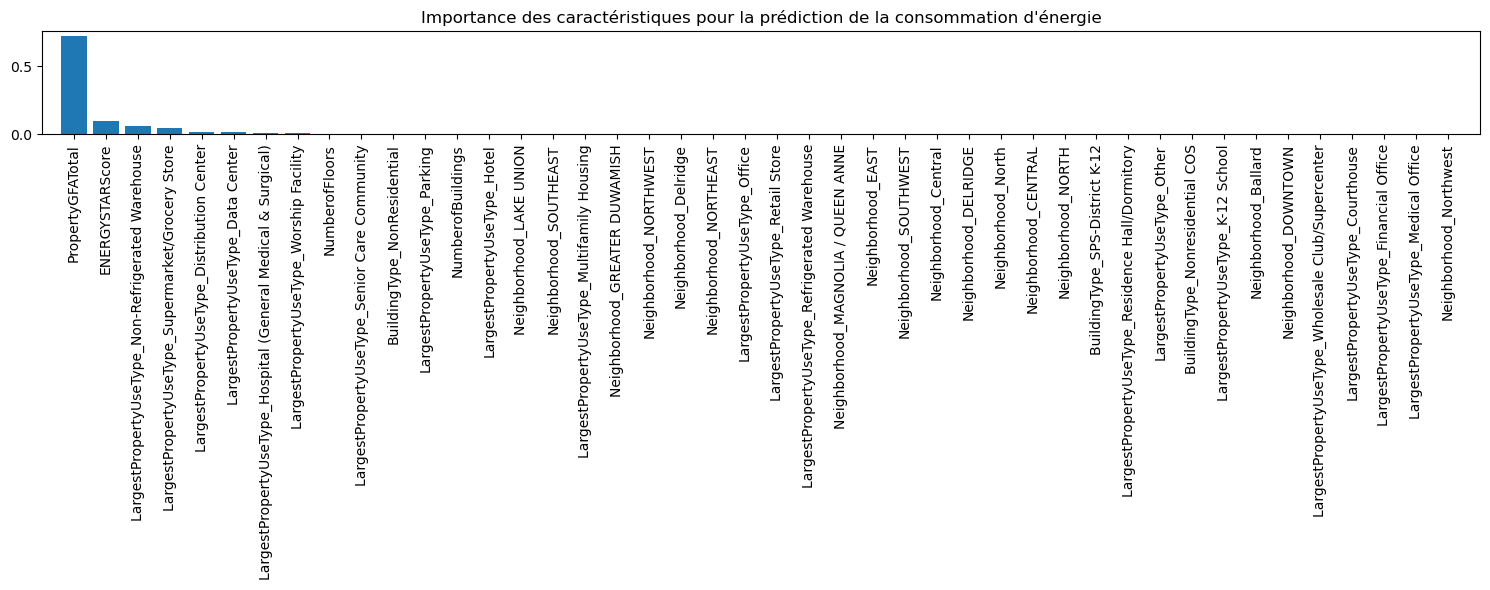

In [71]:
# df_F est mon DataFrame final utilisé pour l'entraînement
feature_names = X.columns

# best_gbr_co2 est notre modèle Gradient Boosting Regressor optimisé

# best_gbr_co2 = GradientBoostingRegressor()  # remplacez par votre modèle optimisé

# Ajustez le modèle sur vos données (exemple)
X = df_F.drop(['Log_TotalGHGEmissions', 'TotalGHGEmissions', 'Log_SiteEnergyUse', 'SiteEnergyUse(kBtu)'], axis=1)
y = df_F['Log_SiteEnergyUse']
best_gbr_energy.fit(X, y)

# Obtenir l'importance des caractéristiques
feature_importances = best_gbr_energy.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Afficher les caractéristiques par ordre d'importance
plt.figure(figsize=(15, 6))
plt.title("Importance des caractéristiques pour la prédiction de la consommation d'énergie")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(feature_importances)])
plt.tight_layout()
plt.savefig("importance_caractéristiques_energie.png")
plt.show()

** Conclusion*
******
La variable principale est PropertyGFATotal suivi de ENERGYSTARScore puis de LargestPropertyUseType_Non-Refrigerated Warehous et de LargestPropertyUseType_Supermarket/Grocery Store, et qui représentent les caractéristiques qui ont le plus d'impact sur les prédictions du modèle de la consommation d'énergie.

### 5.2. Analyse d'importance locale et globale avec SHAP
SHAP (SHapley Additive exPlanations) est une méthode puissante pour interpréter les modèles de machine learning. Elle permet de comprendre l'impact de chaque caractéristique sur une prédiction donnée ainsi que de manière globale.

#### a.Utilisation de SHAP avec le modèle Gradient Boosting Regressor

In [35]:
!pip install shap

In [36]:
import shap

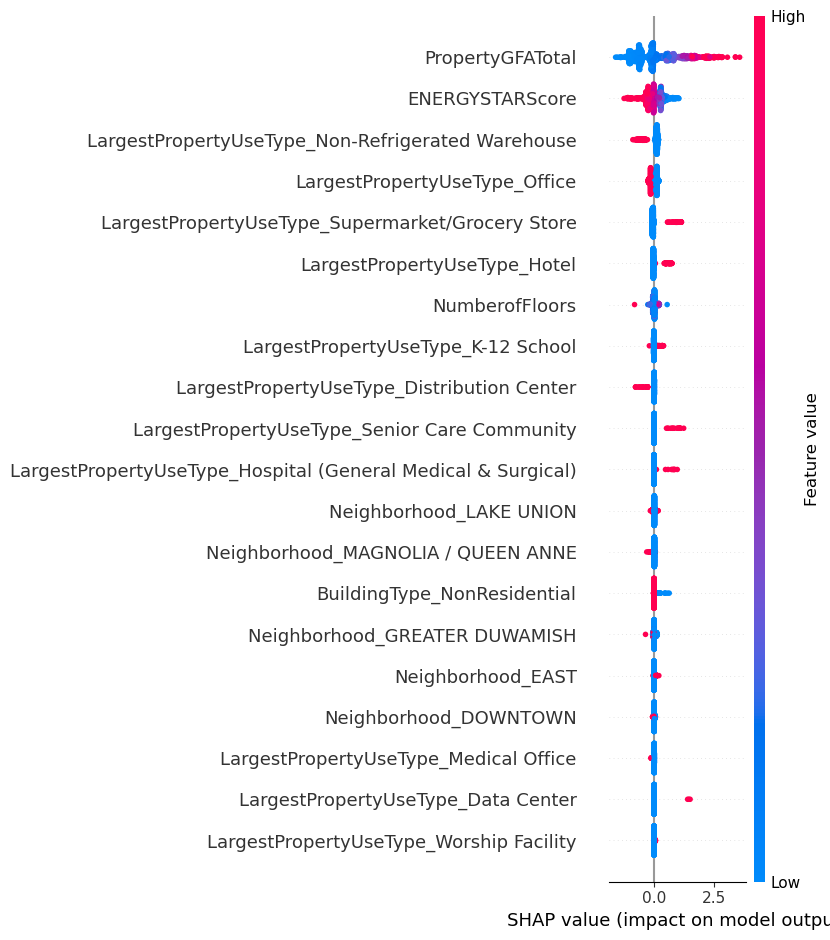

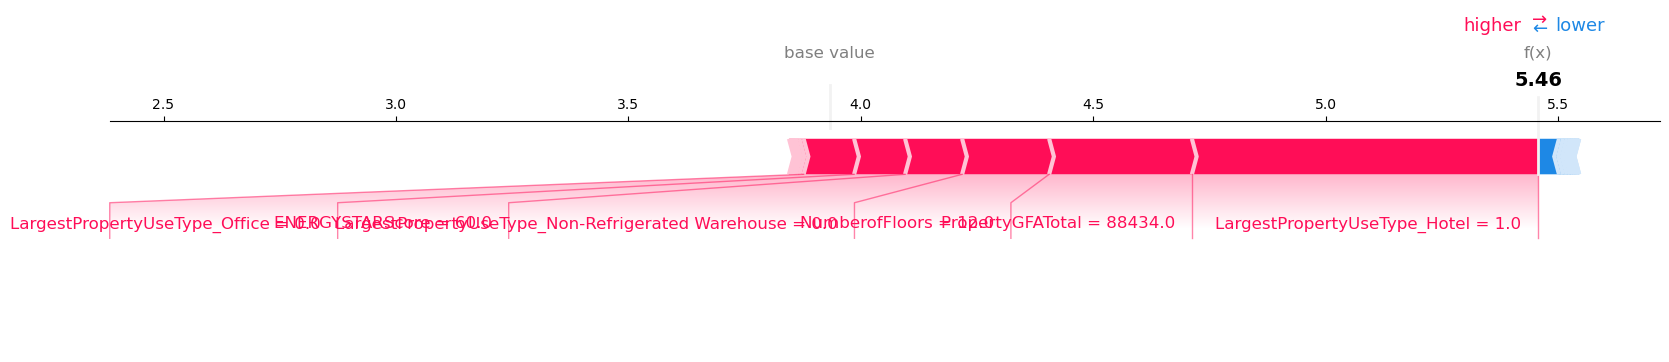

<Figure size 640x480 with 0 Axes>

In [69]:
# Exclure les variables cibles pour l'entraînement
X = df_F.drop(['Log_TotalGHGEmissions', 'Log_SiteEnergyUse', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
y_co2 = df_F['Log_TotalGHGEmissions']

# Convertir les colonnes booléennes en numériques (0 et 1)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Convertir les colonnes non numériques en numériques si nécessaire
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# S'assurer que toutes les valeurs manquantes générées sont traitées (si nécessaire)
X = X.fillna(0)

# Définir et entraîner le modèle optimisé
best_gbr_co2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
best_gbr_co2.fit(X, y_co2)

# Créer un explainer SHAP pour le modèle Gradient Boosting Regressor
explainer_co2 = shap.Explainer(best_gbr_co2, X)
shap_values_co2 = explainer_co2(X)

# Assurez-vous que feature_names est défini
feature_names = X.columns

# Diagramme de summary plot pour l'importance globale des caractéristiques
shap.summary_plot(shap_values_co2, X, feature_names=feature_names)

# Diagramme de force plot pour une observation spécifique
# Utiliser shap_values_co2[0] pour accéder à l'explication pour la première observation
shap.force_plot(explainer_co2.expected_value, shap_values_co2.values[0], X.iloc[0], feature_names=feature_names, matplotlib=True)
plt.tight_layout()
plt.savefig("importance_SHAP_CO2.png")
plt.show()

** Conclusion *
****
  Ce diagramme SHAP Visualise l'importance globale des caractéristiques du modèle et l'explication d'une prédiction pour une observation spécifique. 
  Il affiche les caractéristiques les plus influentes sur les prédictions du modèle, ainsi que leur distribution et leur effet.
  Ces visualisations aident à comprendre quels attributs influencent le plus les émissions de GES totales prévues par le modèle, offrant ainsi des informations précieuses pour des décisions basées sur le modèle.
  
Ici on voit que, PropertyGFATotal, ENERGYSTARScore, LargestPropertyUseType_Supermarket/Grocery Store et LargestPropertyUseType_Non-Refrigerated Warehous, influencent le plus les émissions de GES totales.


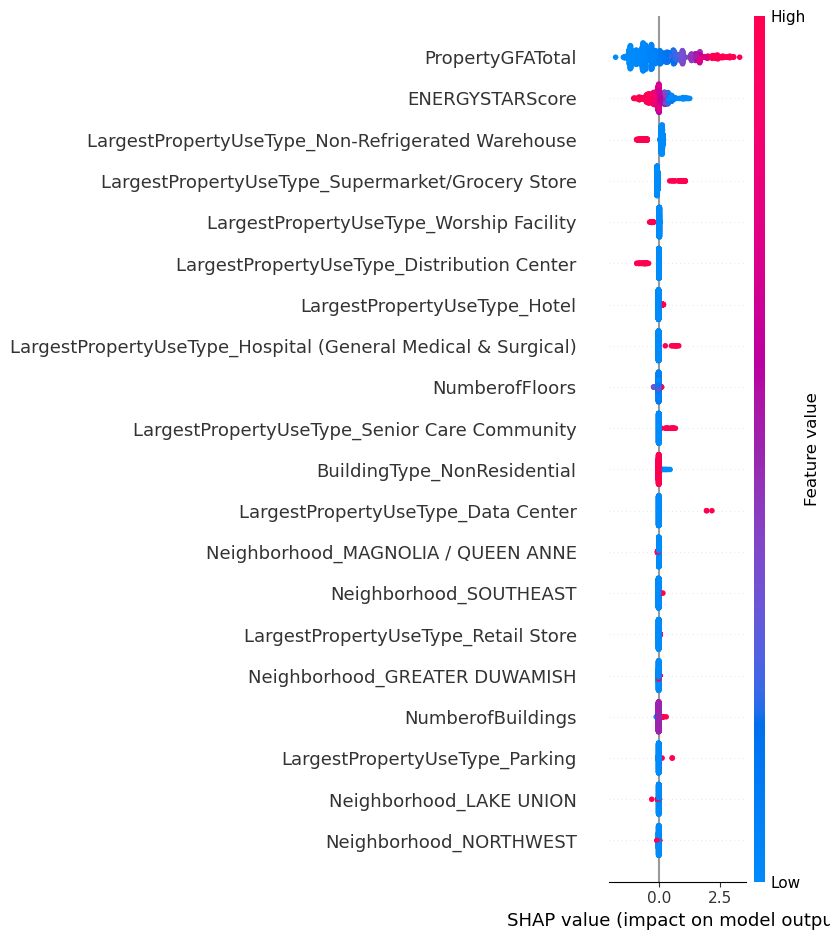

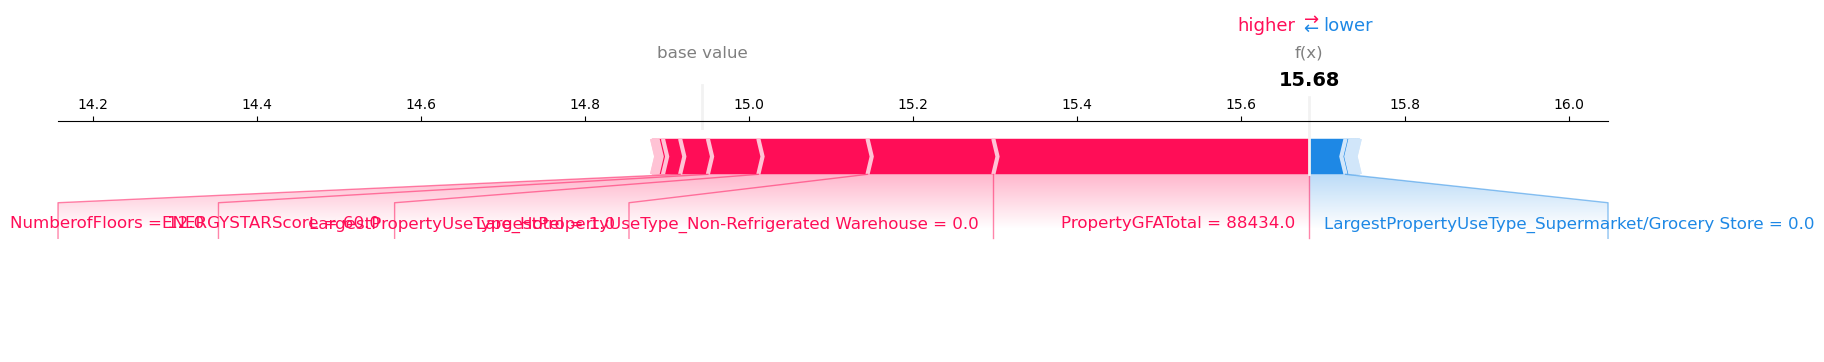

<Figure size 640x480 with 0 Axes>

In [74]:
# Exclure les variables cibles pour l'entraînement
X = df_F.drop(['Log_TotalGHGEmissions', 'Log_SiteEnergyUse', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
y_site_energy = df_F['Log_SiteEnergyUse']

# Convertir les colonnes booléennes en numériques (0 et 1)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Convertir les colonnes non numériques en numériques si nécessaire
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# S'assurer que toutes les valeurs manquantes générées sont traitées (si nécessaire)
X = X.fillna(0)

# Définir et entraîner le modèle optimisé
best_gbr_site_energy = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
best_gbr_site_energy.fit(X, y_site_energy)

# Créer un explainer SHAP pour le modèle Gradient Boosting Regressor
explainer_site_energy = shap.Explainer(best_gbr_site_energy, X)
shap_values_site_energy = explainer_site_energy(X)

# Assurez-vous que feature_names est défini
feature_names = X.columns

# Diagramme de summary plot pour l'importance globale des caractéristiques
shap.summary_plot(shap_values_site_energy, X, feature_names=feature_names)

# Diagramme de force plot pour une observation spécifique
# Utiliser shap_values_site_energy[0] pour accéder à l'explication pour la première observation
shap.force_plot(explainer_site_energy.expected_value, shap_values_site_energy.values[0], X.iloc[0], feature_names=feature_names, matplotlib=True)
plt.tight_layout()
plt.savefig("importance_SHAP_ENERGY.png")
plt.show()

** Conclusion **
  ****
  
Ici on voit que, PropertyGFATotal, ENERGYSTARScore, LargestPropertyUseType_Non-Refrigerated Warehous, et LargestPropertyUseType_Supermarket/Grocery Store, influencent le plus les émissions de GES totales.

### 5.3. Représentation graphique de l'importance des caractéristiques

Pour comprendre comment les caractéristiques (features) individuelles ou des groupes de caractéristiques influencent les prédictions de notre modèle machine learning Gradient Boosting Regressor, nous allons créer des graphiques avec SHAP comme SHAP Interaction Values et le Waterfall Plots.

In [ ]:
print(X.columns)

#### 5.3.1 SHAP Interaction Values
Les valeurs d'interaction SHAP permettent de comprendre les interactions entre les caractéristiques dans les prédictions du modèle.

C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:612: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transforma

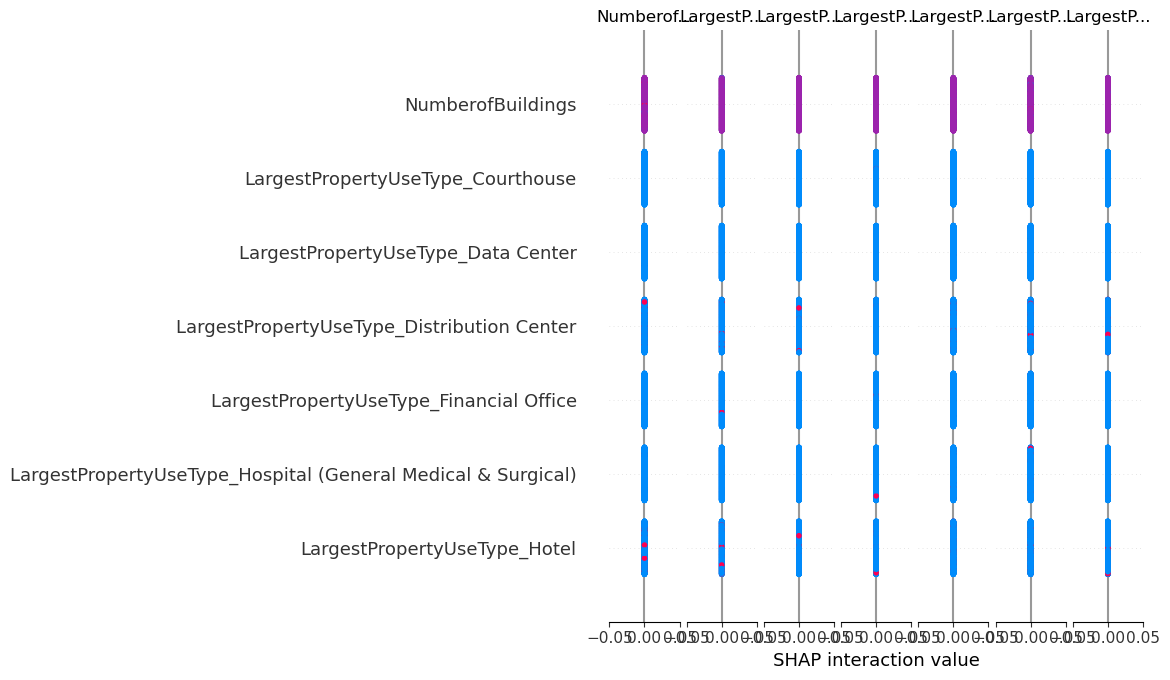

In [75]:
# Les valeurs d'interaction SHAP pour les émissions de CO2

# Calculer les valeurs d'interaction SHAP
shap_interaction_values = explainer_co2.shap_interaction_values(X)

# Diagramme de summary plot pour les valeurs d'interaction SHAP
shap.summary_plot(shap_interaction_values, X)

C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:612: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
C:\Users\SOUKA\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transforma

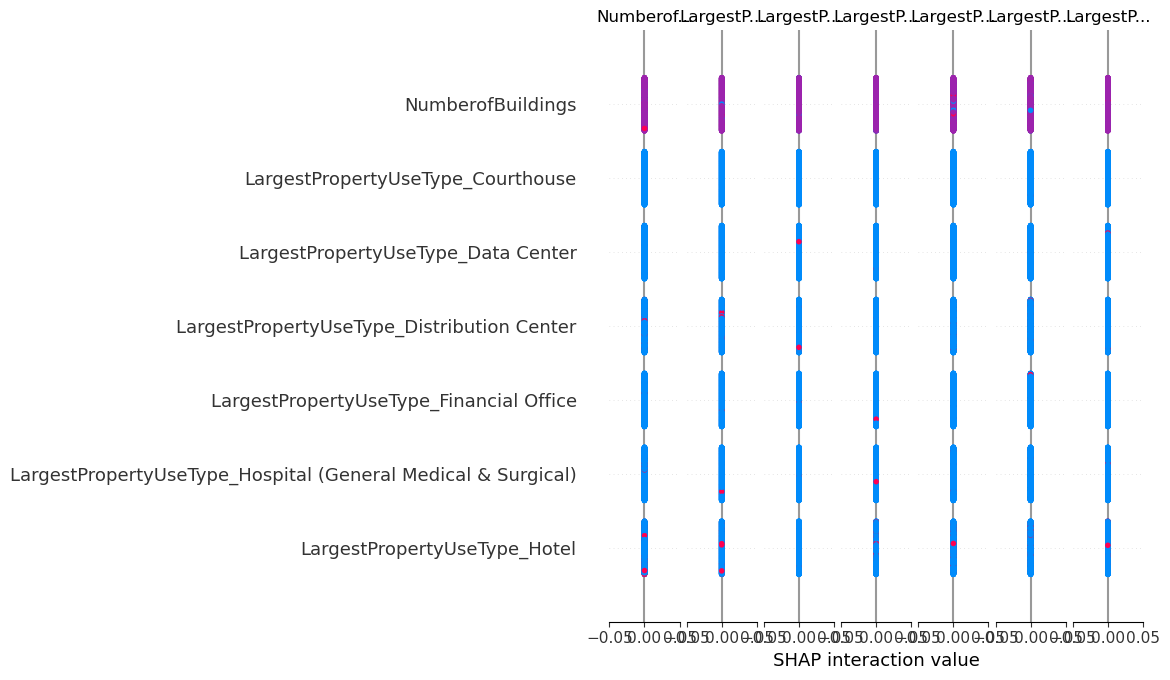

In [76]:
# Les valeurs d'interaction SHAP pour la consommation d'énergie

# Calculer les valeurs d'interaction SHAP
shap_interaction_values = explainer_site_energy.shap_interaction_values(X)

# Diagramme de summary plot pour les valeurs d'interaction SHAP
shap.summary_plot(shap_interaction_values, X)

#### 5.3.2  SHAP Waterfall Plots
Les SHAP waterfall plots montrent l'importance des caractéristiques de manière cumulative pour une prédiction spécifique.

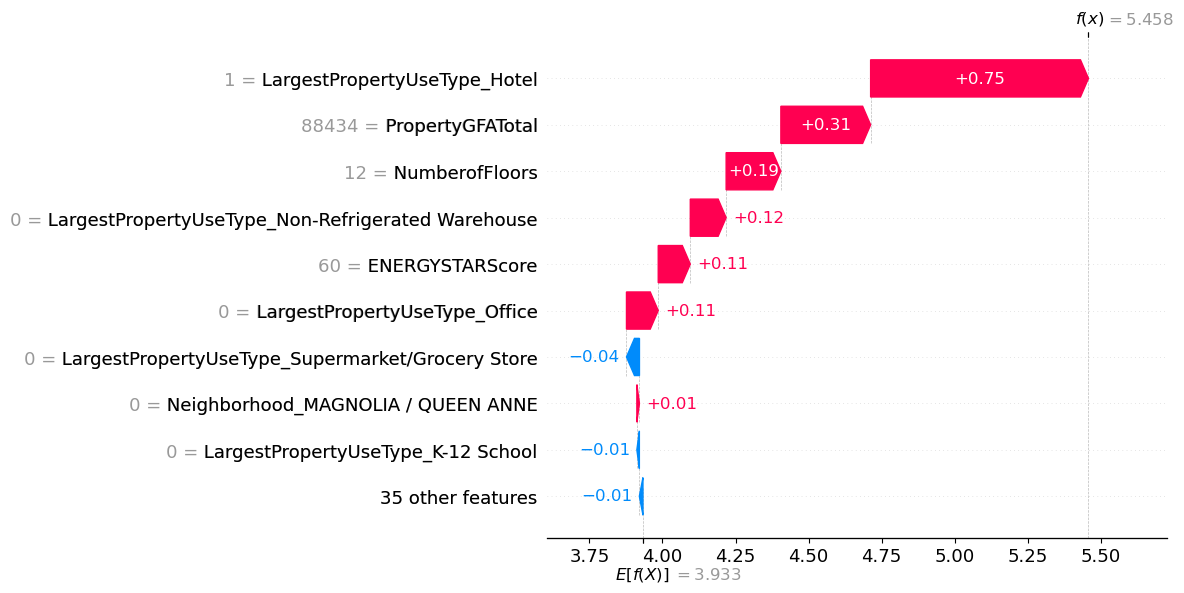

In [79]:
# Waterfall plot pour une observation spécifique (pour la 1ére observation) pour les émissions de CO2
i = 0
shap.waterfall_plot(shap.Explanation(values=shap_values_co2[i], 
                                     base_values=explainer_co2.expected_value, 
                                     data=X.iloc[i], 
                                     feature_names=feature_names))

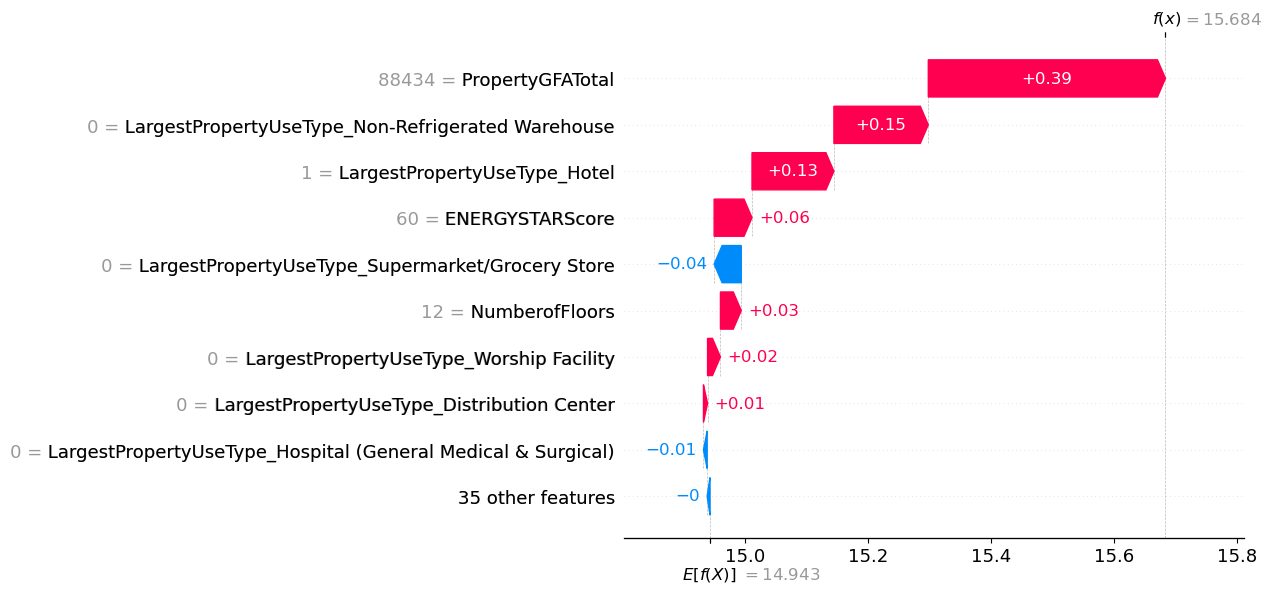

In [80]:
# Waterfall plot pour une observation spécifique (pour la 1ére observation)  pour la consommation d'énergie
i = 0
shap.waterfall_plot(shap.Explanation(values=shap_values_site_energy[i], 
                                     base_values=explainer_site_energy.expected_value, 
                                     data=X.iloc[i], 
                                     feature_names=feature_names))

## Étape 6: Analyse de l'influence de l'EnergyStarScore

### 6.1 Création de sous-ensembles de données avec et sans EnergyStarScore.

In [81]:
# Exclure les variables cibles pour l'entraînement
X = df_F.drop(['Log_TotalGHGEmissions', 'Log_SiteEnergyUse', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
y_co2 = df_F['Log_TotalGHGEmissions']

# Convertir les colonnes booléennes en numériques (0 et 1)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Convertir les colonnes non numériques en numériques si nécessaire
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# S'assurer que toutes les valeurs manquantes générées sont traitées (si nécessaire)
X = X.fillna(0)

# Jeu de données avec EnergyStarScore
X_with_ess = X.copy()

# Jeu de données sans EnergyStarScore
X_without_ess = X.drop(['ENERGYSTARScore'], axis=1)

### 6.2. Normaliser les données 

In [82]:
from sklearn.preprocessing import StandardScaler

# Standardiser les données avec EnergyStarScore
scaler_with_ess = StandardScaler()
X_with_ess_scaled = scaler_with_ess.fit_transform(X_with_ess)

# Standardiser les données sans EnergyStarScore
scaler_without_ess = StandardScaler()
X_without_ess_scaled = scaler_without_ess.fit_transform(X_without_ess)

### 6.3. Entraîner et évaluer le modèle sur les deux jeux de données :

In [84]:
# Définir le modèle Gradient Boosting Regressor avec les hyperparamètres choisis
best_gbr_co2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Standardiser les données avec EnergyStarScore
scaler_with_ess = StandardScaler()
X_with_ess_scaled = scaler_with_ess.fit_transform(X_with_ess)

# Standardiser les données sans EnergyStarScore
scaler_without_ess = StandardScaler()
X_without_ess_scaled = scaler_without_ess.fit_transform(X_without_ess)

# Fonction pour évaluer le modèle avec différentes métriques
def evaluate_model(model, X, y):
    # Calcul du RMSE avec cross-validation
    neg_rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)
    rmse_scores = cross_val_score(model, X, y, cv=5, scoring=neg_rmse_scorer)
    rmse_mean = -rmse_scores.mean()
    rmse_std = rmse_scores.std()

    # Calcul du R² avec cross-validation
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()
    
    return rmse_mean, rmse_std, r2_mean, r2_std

# Évaluer le modèle avec EnergyStarScore
rmse_with_ess_mean, rmse_with_ess_std, r2_with_ess_mean, r2_with_ess_std = evaluate_model(best_gbr_co2, X_with_ess_scaled, y_co2)
print(f'With ENERGYSTARScore: RMSE mean={rmse_with_ess_mean:.4f}, std={rmse_with_ess_std:.4f}, R² mean={r2_with_ess_mean:.4f}, std={r2_with_ess_std:.4f}')

# Évaluer le modèle sans EnergyStarScore
rmse_without_ess_mean, rmse_without_ess_std, r2_without_ess_mean, r2_without_ess_std = evaluate_model(best_gbr_co2, X_without_ess_scaled, y_co2)
print(f'Without ENERGYSTARScore: RMSE mean={rmse_without_ess_mean:.4f}, std={rmse_without_ess_std:.4f}, R² mean={r2_without_ess_mean:.4f}, std={r2_without_ess_std:.4f}')

With ENERGYSTARScore: RMSE mean=0.9071, std=0.0477, R² mean=0.4845, std=0.0471
Without ENERGYSTARScore: RMSE mean=0.9844, std=0.0375, R² mean=0.3924, std=0.0520


** Conclusion *
  ****
  Les résultats obtenus permettent de tirer plusieurs conclusions importantes sur l'impact de la caractéristique ENERGYSTARScore sur la prédiction des émissions de CO2 à l'aide du modèle Gradient Boosting Regressor optimisé. Voici ce que l'on peut déduire :

Avec ENERGYSTARScore :

RMSE (Root Mean Squared Error) :
Moyenne : 0.9071
Écart-type : 0.0477

Le RMSE moyen indique une précision moyenne de prédiction des émissions de CO2 lorsque la caractéristique ENERGYSTARScore est incluse dans le modèle. Plus précisément, les prédictions ont une erreur quadratique moyenne de 0.9071, ce qui représente la différence moyenne entre les valeurs prédites et les valeurs réelles de Log_TotalGHGEmissions.

R² (Coefficient de détermination) :
Moyenne : 0.4845
Écart-type : 0.0471

Le R² moyen indique que le modèle explique environ 48.45% de la variance des émissions de CO2. Cela signifie que le modèle avec ENERGYSTARScore capture raisonnablement bien la variation des données réelles et offre une capacité explicative modérée.


Sans ENERGYSTARScore :

RMSE (Root Mean Squared Error) :
Moyenne : 0.9844
Écart-type : 0.0375

Le RMSE moyen est légèrement plus élevé à 0.9844 par rapport à celui avec ENERGYSTARScore, ce qui suggère une précision légèrement inférieure dans les prédictions des émissions de CO2 lorsque la caractéristique ENERGYSTARScore est exclue du modèle.

R² (Coefficient de détermination) :
Moyenne : 0.3924
Écart-type : 0.0520

Le R² moyen est également inférieur à 0.3924, ce qui indique que le modèle sans ENERGYSTARScore explique moins bien la variance des émissions de CO2 par rapport au modèle qui inclut cette caractéristique. Cela peut être dû à une perte d'information importante que ENERGYSTARScore apporte dans la prédiction des émissions de CO2.

Interprétation :

Impact de ENERGYSTARScore : Les résultats suggèrent que la caractéristique ENERGYSTARScore joue un rôle significatif dans la prédiction des émissions de CO2. Lorsqu'elle est incluse dans le modèle, celui-ci présente généralement une meilleure précision (RMSE plus bas) et une meilleure capacité explicative (R² plus élevé).

Considérations sur l'exclusion de ENERGYSTARScore : Exclure ENERGYSTARScore entraîne une diminution de la performance du modèle, ce qui peut être attribué à la perte d'information pertinente que cette caractéristique apporte à la prédiction des émissions de CO2.

En conclusion, ces résultats soulignent l'importance de la caractéristique ENERGYSTARScore dans le modèle de prédiction des émissions de CO2, montrant qu'elle contribue significativement à l'amélioration de la précision et de la capacité explicative du modèle.

## Étape 7: Simulation de la 2ème target

### 7.1 Création de sous-ensembles de données avec et sans EnergyStarScore

In [89]:
# Exclure les variables cibles pour l'entraînement
X = df_F.drop(['Log_TotalGHGEmissions', 'Log_SiteEnergyUse', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
y_energy = df_F['Log_SiteEnergyUse']

# Convertir les colonnes booléennes en numériques (0 et 1)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Convertir les colonnes non numériques en numériques si nécessaire
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# S'assurer que toutes les valeurs manquantes générées sont traitées (si nécessaire)
X = X.fillna(0)

# Jeu de données avec EnergyStarScore
X_with_ess = X.copy()

# Jeu de données sans EnergyStarScore
X_without_ess = X.drop(['ENERGYSTARScore'], axis=1)

### 7.2 Normaliser les données 

In [90]:
# Standardiser les données avec EnergyStarScore
scaler_with_ess = StandardScaler()
X_with_ess_scaled = scaler_with_ess.fit_transform(X_with_ess)

# Standardiser les données sans EnergyStarScore
scaler_without_ess = StandardScaler()
X_without_ess_scaled = scaler_without_ess.fit_transform(X_without_ess)

### 7.3 Entraîner et évaluer le modèle sur les deux jeux de données

In [91]:
# Définir le modèle Gradient Boosting Regressor
model_energy = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fonction pour évaluer le modèle avec différentes métriques
def evaluate_model(model, X, y):
    # Calcul du RMSE
    neg_rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)
    rmse_scores = cross_val_score(model, X, y, cv=5, scoring=neg_rmse_scorer)
    rmse_mean = -rmse_scores.mean()
    rmse_std = rmse_scores.std()

    # Calcul du R²
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()
    
    return rmse_mean, rmse_std, r2_mean, r2_std

# Évaluer le modèle avec EnergyStarScore
rmse_with_ess_mean, rmse_with_ess_std, r2_with_ess_mean, r2_with_ess_std = evaluate_model(model_energy, X_with_ess_scaled, y_energy)
print(f'With ENERGYSTARScore: RMSE mean={rmse_with_ess_mean:.4f}, std={rmse_with_ess_std:.4f}, R² mean={r2_with_ess_mean:.4f}, std={r2_with_ess_std:.4f}')

# Évaluer le modèle sans EnergyStarScore
rmse_without_ess_mean, rmse_without_ess_std, r2_without_ess_mean, r2_without_ess_std = evaluate_model(model_energy, X_without_ess_scaled, y_energy)
print(f'Without ENERGYSTARScore: RMSE mean={rmse_without_ess_mean:.4f}, std={rmse_without_ess_std:.4f}, R² mean={r2_without_ess_mean:.4f}, std={r2_without_ess_std:.4f}')

With ENERGYSTARScore: RMSE mean=0.5007, std=0.0272, R² mean=0.7786, std=0.0308
Without ENERGYSTARScore: RMSE mean=0.6240, std=0.0306, R² mean=0.6523, std=0.0675


** Conclusion **
  ****

Pour la prédiction de la deuxième cible, Log_SiteEnergyUse, voici ce que l'on peut déduire des résultats obtenus :

Avec ENERGYSTARScore :
RMSE (Root Mean Squared Error) :

Moyenne : 0.5007
Écart-type : 0.0272
Un RMSE moyen de 0.5007 indique une précision élevée dans la prédiction de Log_SiteEnergyUse lorsque ENERGYSTARScore est inclus dans le modèle. Cela signifie que les prédictions ont une erreur quadratique moyenne de 0.5007, ce qui est relativement faible et indique une bonne capacité du modèle à prédire cette cible.

R² (Coefficient de détermination) :

Moyenne : 0.7786
Écart-type : 0.0308
Un R² moyen de 0.7786 montre que le modèle explique environ 77.86% de la variance des valeurs réelles de Log_SiteEnergyUse. C'est un bon indicateur de la capacité du modèle à expliquer la variation observée dans cette cible.

Sans ENERGYSTARScore :
RMSE (Root Mean Squared Error) :

Moyenne : 0.6240
Écart-type : 0.0306
Le RMSE moyen est légèrement plus élevé à 0.6240 lorsque ENERGYSTARScore est exclu du modèle. Cela indique une précision légèrement inférieure dans les prédictions de Log_SiteEnergyUse par rapport au modèle qui inclut ENERGYSTARScore.

R² (Coefficient de détermination) :

Moyenne : 0.6523
Écart-type : 0.0675
Le R² moyen est également inférieur à 0.6523, ce qui suggère que le modèle sans ENERGYSTARScore explique moins bien la variance des valeurs réelles de Log_SiteEnergyUse par rapport au modèle avec ENERGYSTARScore.

Interprétation :
Impact de ENERGYSTARScore : Les résultats montrent que ENERGYSTARScore est une caractéristique importante pour prédire Log_SiteEnergyUse. Lorsqu'elle est incluse dans le modèle, cela conduit à des prédictions plus précises et à une meilleure explication de la variance des données réelles (R² plus élevé).

Considérations sur l'exclusion de ENERGYSTARScore : Exclure ENERGYSTARScore entraîne une diminution de la performance du modèle pour prédire Log_SiteEnergyUse, ce qui indique que cette caractéristique apporte une information importante à la prédiction de la consommation énergétique du site.

En conclusion, pour la prédiction de Log_SiteEnergyUse, les résultats confirment que ENERGYSTARScore joue un rôle significatif dans le modèle, améliorant à la fois la précision des prédictions (RMSE réduit) et la capacité explicative (R² augmenté). Son inclusion est donc essentielle pour obtenir des prédictions précises et fiables de la consommation énergétique du site.